In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.shape

(7043, 21)

In [7]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The raw data contains 7043 rows (customers) and 21 columns (features).

The “Churn” column is our target.

In [8]:
data['Churn']=data['Churn'].map({'No':0,'Yes':1})

In [9]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                 int64
dtype: object

In [10]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [11]:
data['TotalCharges'].unique()# as in the data set total charges should be in float we will convert it into float

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [12]:
data['TotalCharges']=pd.to_numeric(data['TotalCharges'],errors='coerce')#as there are some empty string so errors =coerce is handling that

In [13]:
df=data.drop(['customerID'],axis=1)# we don't need customerID as it doesn't related with churn in any way.

In [14]:
df=pd.get_dummies(df)

In [15]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0


In [16]:
df['SeniorCitizen'].value_counts()# we can mostly youth are there

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


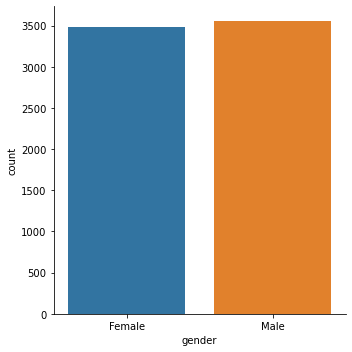

In [17]:
sns.factorplot(x='gender',data=data,kind='count')#Male gender is slightly more than female that may be becz of population also

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


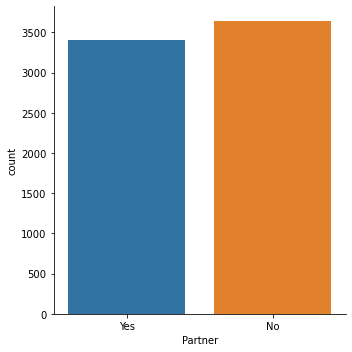

In [18]:
sns.factorplot(x='Partner',data=data,kind='count')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


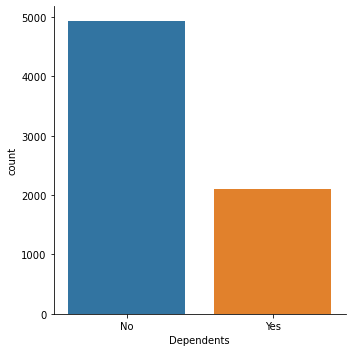

In [19]:
sns.factorplot(x='Dependents',data=data,kind='count')#So the one who has partner can also have also dependents 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 1440x1440 with 0 Axes>

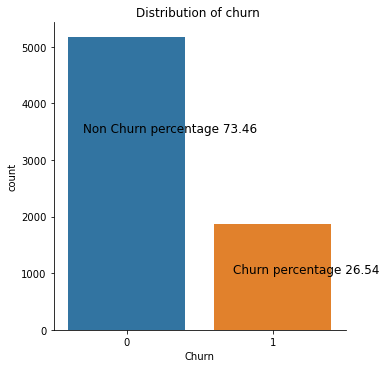

In [20]:
churn=df['Churn'].sum()
non_churn=len(df)-churn
churn_per=round(churn/len(df)*100,2)
non_churn_per=round(non_churn/len(df)*100,2)
plt.figure(figsize=(20,20))
sns.factorplot(x='Churn',data=df,kind='count') #Most of the customer is not churning
plt.annotate("Non Churn percentage {}".format(non_churn_per),xy=(-0.3,3500),size=12)
plt.annotate("Churn percentage {}".format(churn_per),xy=(0.73 ,1000),size=12)
plt.title("Distribution of churn ")
plt.show()

In [21]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


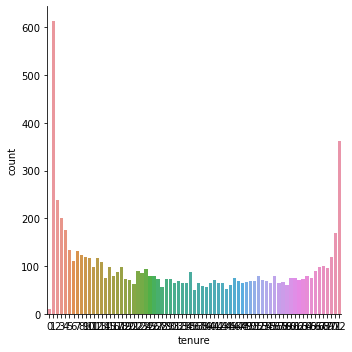

In [22]:
sns.factorplot(x='tenure',data=data,kind='count') #At start number of customer is high at start of  the tenure but it is a continuous feature so we will take the data in some bins

<AxesSubplot:xlabel='tenure', ylabel='Count'>

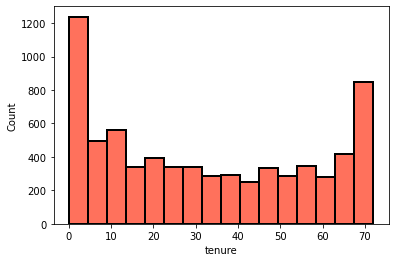

In [23]:
sns.histplot(x='tenure',data=data,edgecolor="black",linewidth=2,color='#ff4125')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Count'>

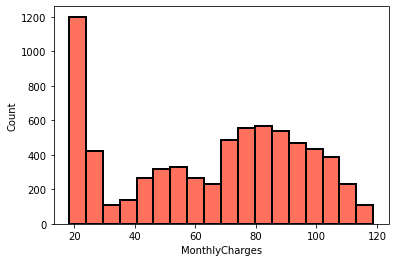

In [24]:
sns.histplot(x='MonthlyCharges',data=data,edgecolor="black",linewidth=2,color='#ff4125')

<AxesSubplot:xlabel='TotalCharges', ylabel='Count'>

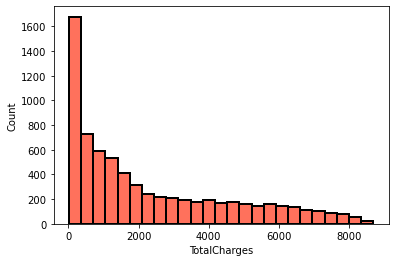

In [25]:
sns.histplot(x='TotalCharges',data=data,edgecolor="black",linewidth=2,color='#ff4125')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


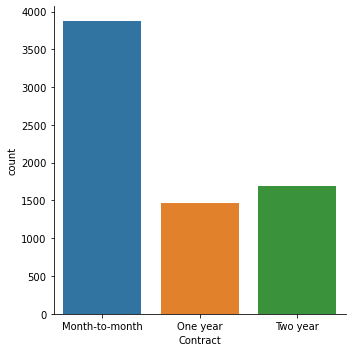

In [26]:
sns.factorplot(x='Contract',data=data,kind='count')

We can see most of the customer are for MONTH-to-Month contact and 1 year \2 year contract are similar and less than month 2 month contract

In [27]:
data['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

<AxesSubplot:title={'center':'Month-to-Month tenure Result'}, xlabel='tenure', ylabel='Count'>

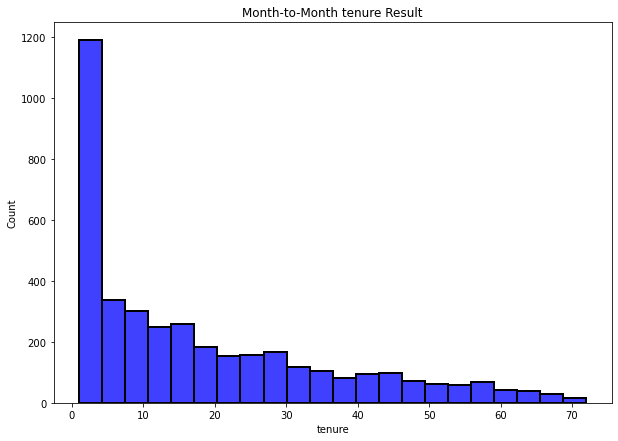

In [28]:
plt.figure(figsize=(10,7))
plt.title("Month-to-Month tenure Result")
sns.histplot(x=data[data['Contract']=='Month-to-month']['tenure'],data=data,edgecolor="black",linewidth=2,color='blue')

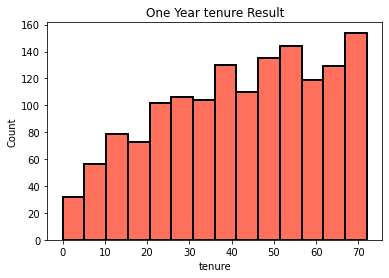

In [29]:

plt.title("One Year tenure Result")
sns.histplot(x=data[data['Contract']=='One year']['tenure'],data=data,edgecolor="black",linewidth=2,color='#ff4125')
plt.show()


<AxesSubplot:xlabel='tenure', ylabel='Count'>

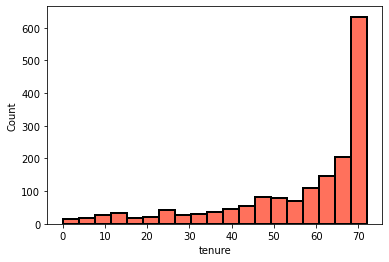

In [30]:

sns.histplot(x=data[data['Contract']=='Two year']['tenure'],data=data,edgecolor="black",linewidth=2,color='#ff4125')

Here we can see that the customers with 2 year contract are more loyal while the customer for month to month is loyal at start but later they churn

In [31]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

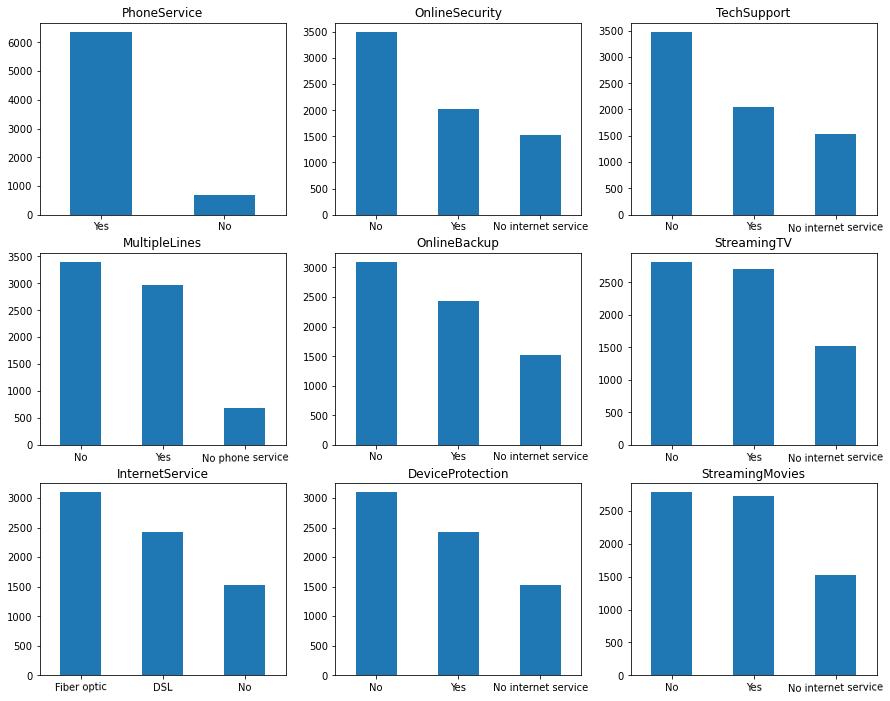

In [32]:
services = ['PhoneService','MultipleLines','InternetService','OnlineSecurity',
           'OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
fig,axes=plt.subplots(3,3,figsize = (15,12))
for i,item in enumerate(services):
    if i<3:
        ax=data[item].value_counts().plot(kind='bar',ax=axes[i,0],rot=1)
    elif i>=3 and i<6:
        ax=data[item].value_counts().plot(kind='bar',ax=axes[i-3,1],rot=0)#* how to chnage the color of each bar plot
    else:
        ax=data[item].value_counts().plot(kind='bar',ax=axes[i-6,2],rot=1)#rot is use to rotate the x axis labeling
    ax.set_title(item)

In [33]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

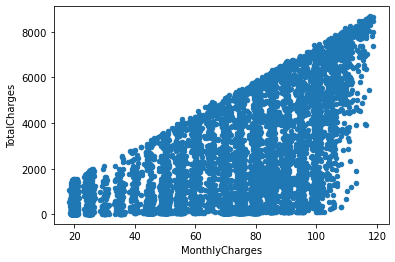

In [34]:
data[['MonthlyCharges','TotalCharges']].plot.scatter(x='MonthlyCharges',y='TotalCharges')

We can see there is linear dependency between MonthlyCharges and TotalCharges ,it should be like that as Monthly bill comes the total charges should increase

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

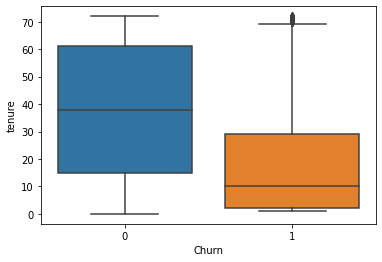

In [35]:
sns.boxplot(x = data['Churn'], y = data['tenure'])

Relation between senior citizen and churn rate i.e Churn by Seniority

In [36]:
colors=['red','blue']
ch_se=data.groupby(['SeniorCitizen','Churn']).size().unstack()
ch_se

Churn,0,1
SeniorCitizen,,
0,4508,1393
1,666,476


In [37]:
ax=((ch_se.T*100.0)/ch_se.T.sum())
ax

SeniorCitizen,0,1
Churn,,
0,76.393832,58.318739
1,23.606168,41.681261


<AxesSubplot:xlabel='SeniorCitizen'>

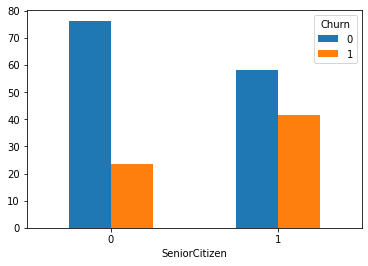

In [38]:
ax.T.plot(kind='bar',rot=0)

We can see here senior citizen is churned doubled as comaprizon to youth generation

Text(0.5, 1.0, 'Distribution of monthly charges by churn')

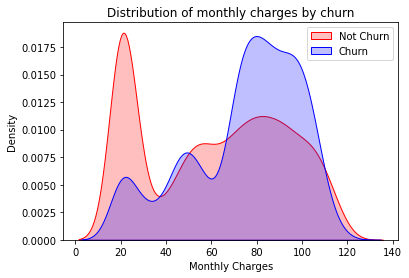

In [39]:
ax=sns.kdeplot(data[data['Churn']==0]['MonthlyCharges'],color='Red',shade='True')
ax=sns.kdeplot(data[data['Churn']==1]['MonthlyCharges'],color='Blue',shade='True')
ax.legend(['Not Churn','Churn'],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Charges')
ax.set_title('Distribution of monthly charges by churn')

It seems that customers are churn mostly when the monthly charges are higher

Text(0.5, 1.0, 'Distribution of total charges by churn')

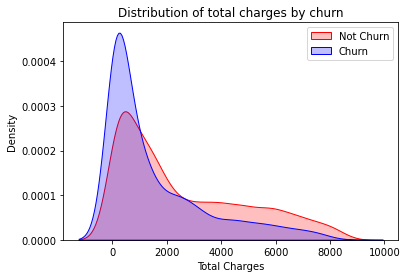

In [40]:
ax=sns.kdeplot(data[data['Churn']==0]['TotalCharges'],color='Red',shade='True')
ax=sns.kdeplot(data[data['Churn']==1]['TotalCharges'],color='Blue',shade='True')
ax.legend(['Not Churn','Churn'],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total Charges')
ax.set_title('Distribution of total charges by churn')

It seems from this graph that when total charges is higher then the churn rate is less

After aove EDA we will build predictive model to predict the output
we will use classification algorithms here as Logistic regression, RandomForestClassifier,SVM,XGBoost,Adaboost

In [41]:
# Replacing infinite with nan
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

#from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X))

In [42]:
# We will use the data frame where we had created dummy variables
df_n=df.copy()
X = df_n.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
feature=X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns=feature


In [43]:
X.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0.0,0.000000,0.115423,0.001275,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.0,0.464789,0.385075,0.215867,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.014085,0.354229,0.010310,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
3,0.0,0.619718,0.239303,0.210241,0.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.014085,0.521891,0.015330,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [44]:
df_n.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [45]:
df.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Partner_No', 'Partner_Yes',
       'Dependents_No', 'Dependents_Yes', 'PhoneService_No',
       'PhoneService_Yes', 'MultipleLines_No',
       'MultipleLines_No phone service', 'MultipleLines_Yes',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'OnlineSecurity_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'OnlineBackup_No', 'OnlineBackup_No internet service',
       'OnlineBackup_Yes', 'DeviceProtection_No',
       'DeviceProtection_No internet service', 'DeviceProtection_Yes',
       'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',
       'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two

In [46]:

y=df['Churn']
#y.dropna(inplace=True)
print(type(X))
print(type(y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,y,random_state=1,test_size=0.2)
X.dropna(inplace=True)

In [48]:
np.any(np.isnan(X))#previously it is True and finite is false so first replace infinite to nan values and then drop nan values.

False

In [49]:
np.all(np.isfinite(X))

True

In [50]:
np.any(np.isnan(y))

False

In [51]:
np.all(np.isfinite(y))

True

In [52]:
LG=LogisticRegression()
LG.fit(X_train,Y_train)

LogisticRegression()

In [53]:
Y_pred=LG.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
Logistic=accuracy_score(Y_test,Y_pred)

In [55]:
weight=pd.Series(LG.coef_[0],index=X.columns.values)

AxesSubplot(0.125,0.125;0.775x0.755)


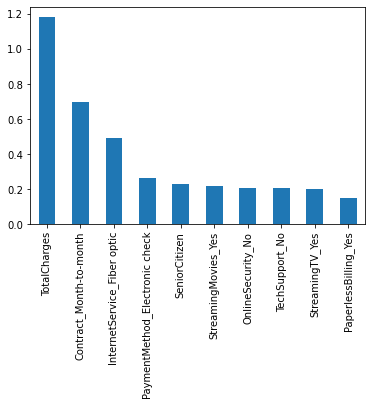

In [56]:
print (weight.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


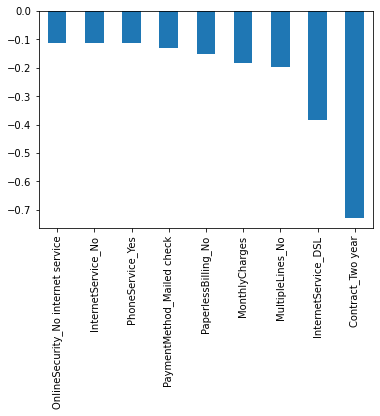

In [57]:
print (weight.sort_values(ascending = False)[-10:-1].plot(kind='bar'))

In [58]:
from sklearn.ensemble import RandomForestClassifier
RC=RandomForestClassifier(n_estimators=1000, n_jobs = -1,random_state =50, max_features = "auto",max_leaf_nodes = 30)
RC.fit(X_train,Y_train)
Y_pred=RC.predict(X_test)
RandomForest=accuracy_score(Y_pred,Y_test)

<AxesSubplot:>

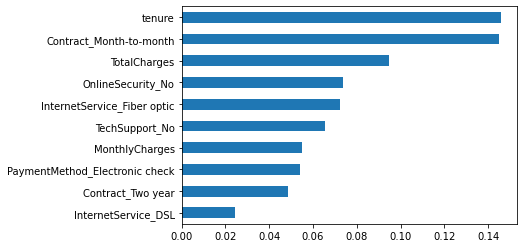

In [59]:
importance=RC.feature_importances_
weight=pd.Series(importance,index=X.columns.values)

weight.sort_values()[-10:].plot(kind='barh')

In [60]:
from sklearn.svm import SVC
svm2=SVC(kernel='linear')
svm2.fit(X_train,Y_train)
Y_pred=svm2.predict(X_test)
SVC=accuracy_score(Y_pred,Y_test)

In [61]:
from sklearn.ensemble import AdaBoostClassifier
AD=AdaBoostClassifier()
AD.fit(X_train,Y_train)
Y_pred=AD.predict(X_test)
Adaboost=accuracy_score(Y_pred,Y_test)

In [62]:
from xgboost import XGBClassifier
XG=XGBClassifier()
XG.fit(X_train,Y_train)
Y_pred=XG.predict(X_test)
XGBoost=accuracy_score(Y_pred,Y_test)

In [63]:
models=['Logistic','RandomForest','SVC','Adaboost','XGBoost']
score=[Logistic,RandomForest,SVC,Adaboost,XGBoost]
dic={'Models':models,'Score':score}
d=pd.DataFrame(dic)

In [64]:
d

,Models,Score
0,Logistic,0.798152
1,RandomForest,0.801706
2,SVC,0.793888
3,Adaboost,0.800284
4,XGBoost,0.781095


From here we can conclude that RandomForestClassifer is having best accuracy score among other algorithm for this dataset